# Where should Amazon build its next fulfillment center? v2

## Assumptions made:
* One main purpose for the fulfillment center is to enable Amazon’s core value: fast delivery
* Look outside of the US to uncover new global market opportunity
* Select from existing Amazon countries to leverage infrastructure and regulatory compliance
* Use Amazon US as a benchmark for success 

<img src="Images/amazon-fulfillment-center.jpeg" width="600" height="600" align="left"/>

In [1]:
# Import libraries
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import folium
import datetime as dt
import webbrowser
import plotly.express as px

In [2]:
# Load and explore data of world cities from https://simplemaps.com/data/world-cities
data = pd.read_csv('Data/worldcities.csv')
data.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [4]:
# Find how many cities in Brazil
data.loc[data.country == 'Brazil'].count()

city          387
city_ascii    387
lat           387
lng           387
country       387
iso2          387
iso3          387
admin_name    387
capital        27
population    387
id            387
dtype: int64

In [16]:
# Filter data to only have Brazil
brazil = data[data.country.isin(['Brazil'])]
print(brazil.shape)
brazil.head()

(387, 11)


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
13,Rio de Janeiro,Rio de Janeiro,-22.9250,-43.2250,Brazil,BR,BRA,Rio de Janeiro,admin,11748000.0,1076887657
45,Belo Horizonte,Belo Horizonte,-19.9150,-43.9150,Brazil,BR,BRA,Minas Gerais,admin,5575000.0,1076967355
75,Porto Alegre,Porto Alegre,-30.0500,-51.2000,Brazil,BR,BRA,Rio Grande do Sul,admin,3917000.0,1076658221
79,Brasília,Brasilia,-15.7833,-47.9161,Brazil,BR,BRA,Distrito Federal,primary,3716996.0,1076144436


In [18]:
# Use k-means to find clusters 
brazil2 = brazil[['lat', 'lng']]
kmeans = KMeans(n_clusters = 10)

,lat,lng
4,-23.5587,-46.6250
13,-22.9250,-43.2250
45,-19.9150,-43.9150
75,-30.0500,-51.2000
79,-15.7833,-47.9161
...,...,...
14224,-2.8727,-67.8019
14316,-15.0000,-59.9500
14343,-12.4167,-64.4166
15160,2.0500,-50.8000


In [9]:
print(data.shape)
print(data.describe())
print(data.info)

(15493, 11)
                lat           lng    population            id
count  15493.000000  15493.000000  1.380800e+04  1.549300e+04
mean      29.633315    -29.834189  1.812480e+05  1.623208e+09
std       22.414727     76.340457  7.947989e+05  2.826451e+08
min      -54.933300   -179.590000  0.000000e+00  1.004003e+09
25%       22.305000    -86.324200  9.167500e+03  1.404601e+09
50%       37.756200    -71.916700  2.349650e+04  1.826644e+09
75%       42.444200     25.582100  9.030625e+04  1.840015e+09
max       82.483300    179.383300  3.567600e+07  1.934000e+09
<bound method DataFrame.info of               city   city_ascii      lat       lng        country iso2 iso3  \
0            Tokyo        Tokyo  35.6850  139.7514          Japan   JP  JPN   
1         New York     New York  40.6943  -73.9249  United States   US  USA   
2      Mexico City  Mexico City  19.4424  -99.1310         Mexico   MX  MEX   
3           Mumbai       Mumbai  19.0170   72.8570          India   IN  IND   
4  

In [4]:
print(data.isnull().sum())

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             31
iso3              0
admin_name      191
capital       10247
population     1685
id                0
dtype: int64


In [22]:
data['population'].fillna((data['population'].mean()), inplace=True)

In [23]:
print(data.isnull().sum())

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             31
iso3              0
admin_name      191
capital       10247
population        0
id                0
dtype: int64


In [24]:
print(data.dtypes)

city           object
city_ascii     object
lat           float64
lng           float64
country        object
iso2           object
iso3           object
admin_name     object
capital        object
population    float64
id              int64
dtype: object


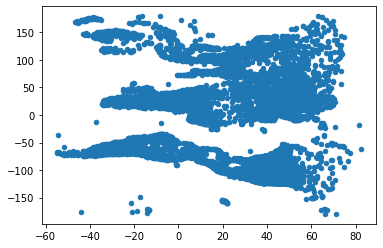

In [25]:
# Plot
plt.scatter(data['lat'], data['lng'], s= 20)

In [26]:
df = pd.DataFrame(data, columns = ['lat', 'lng'])
print(df)

           lat       lng
0      35.6850  139.7514
1      40.6943  -73.9249
2      19.4424  -99.1310
3      19.0170   72.8570
4     -23.5587  -46.6250
...        ...       ...
15488  62.5333  -42.2167
15489  51.3894   30.0989
15490  69.6510  162.3336
15491  74.0165  111.5100
15492  61.1333 -100.8833

[15493 rows x 2 columns]


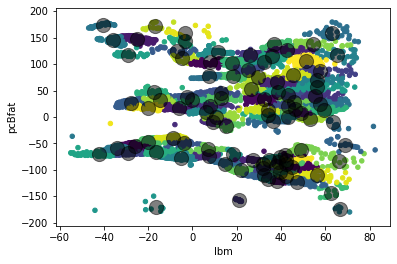

In [27]:
data2 = data[['lat', 'lng']]

kmeans = KMeans(n_clusters = 100)
kmeans.fit(data2)
y_means = kmeans.predict(data2)
plt.scatter(data['lat'], data['lng'], c=y_means, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.xlabel('lbm')
plt.ylabel('pcBfat')
plt.show()

In [28]:
data['lng']

0        139.7514
1        -73.9249
2        -99.1310
3         72.8570
4        -46.6250
           ...   
15488    -42.2167
15489     30.0989
15490    162.3336
15491    111.5100
15492   -100.8833
Name: lng, Length: 15493, dtype: float64

In [29]:
import os
os.environ['PROJ_LIB'] = '/Users/allenj/opt/anaconda3/share/proj'

In [30]:
centers

array([[ 4.49090131e+01, -9.42151316e+01],
       [ 7.87802000e+00,  1.02992669e+02],
       [ 3.22340246e+01,  3.37697493e+01],
       [-2.60340151e+01, -5.40445891e+01],
       [ 3.81378810e+01, -1.21561814e+02],
       [ 4.18999550e+01, -7.27885797e+01],
       [ 4.89281639e+01,  7.42217152e+00],
       [-2.49701127e+01,  1.48216776e+02],
       [-6.16413579e+00,  1.68068179e+01],
       [ 4.28312437e+01,  1.26646931e+02],
       [ 2.73615241e+01, -8.13332160e+01],
       [ 3.81069661e+01,  6.62768107e+01],
       [ 9.23598367e+00, -8.93676122e+00],
       [ 7.52784128e+00, -7.35722193e+01],
       [ 8.03530400e+00,  1.99667573e+01],
       [ 5.53957738e+01,  3.97490098e+01],
       [ 2.61799350e+01,  1.16743727e+02],
       [ 2.11350236e+01, -1.57480444e+02],
       [ 3.88333987e+01, -8.49771217e+01],
       [ 5.73954098e+01,  8.75079951e+01],
       [ 3.16808440e+01, -9.70561095e+01],
       [-2.89440427e+01, -6.78090768e+01],
       [ 2.51244624e+01,  8.94583642e+01],
       [ 4.

In [31]:
centers[:,0]

array([ 44.90901312,   7.87802   ,  32.23402463, -26.03401513,
        38.13788102,  41.89995498,  48.92816392, -24.97011268,
        -6.16413579,  42.83124371,  27.36152407,  38.10696612,
         9.23598367,   7.52784128,   8.035304  ,  55.39577377,
        26.17993504,  21.13502364,  38.83339868,  57.39540984,
        31.68084398, -28.94404268,  25.12446239,  43.18501863,
        12.80859355,  42.99223766,  -3.90780345,  -2.33681685,
        -7.12043878, -27.97821053,  32.12504545,  47.24496435,
        68.91499048,  36.18765775,  14.79027926,  63.3204575 ,
        62.80170541,   7.37815574,  57.7059072 , -40.545542  ,
       -34.15612917, -35.66203131,  66.7316    ,  56.26309104,
        65.46314242,  -5.31941271,  42.96438246,   6.05813644,
        11.34391769,  34.09633183,  34.53335337,  18.44256794,
       -16.62524737,  32.45635833,  56.187225  ,  38.46227126,
       -29.03957105,  39.74734593, -42.17811205,  35.99184359,
        -3.52226875,  34.20151875, -16.28523388, -17.34

In [32]:
list = pd.DataFrame(centers[:,0])
print(list)

            0
0   44.909013
1    7.878020
2   32.234025
3  -26.034015
4   38.137881
..        ...
95  -3.452055
96  42.101900
97 -19.972731
98  42.023533
99  51.451773

[100 rows x 1 columns]


In [33]:
data['lng']

0        139.7514
1        -73.9249
2        -99.1310
3         72.8570
4        -46.6250
           ...   
15488    -42.2167
15489     30.0989
15490    162.3336
15491    111.5100
15492   -100.8833
Name: lng, Length: 15493, dtype: float64

In [41]:
import pandas as pd
import plotly.graph_objects as go
df = data
df.head()

fig = go.Figure(data = go.Scattergeo(
    lon = df['lng'],
    lat = df['lat'],
    mode = 'markers',
    marker = dict(
        size = 3,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = True,
        symbol = 'circle',
        line = dict(
            width = 1,
            color = ['rgba(102, 102, 102)']
        ),
        cmin = 0,
        color = y_means,
        colorbar_title = "City Clusters"
    )
))

fig.add_trace(go.Scattergeo(
    lon = centers[:,1],
    lat = centers[:,0],
    mode = 'markers',
    marker = dict(
        size = 8,
        line = dict(
            width = 1,
            color = 'orange'
        ),
        color = 'orange',
    )
))

fig.update_layout(
    title = "World City Clusters and Centroids ",
    geo = dict(
        scope = "world",
        showland = True,
    )
)

# Print to new page: fig.write_html('first_figure.html', auto_open=True)
fig

In [23]:
# How many entries for Brazil
data.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [24]:
data.loc[data.country == 'Brazil'].count()

city          387
city_ascii    387
lat           387
lng           387
country       387
iso2          387
iso3          387
admin_name    387
capital        27
population    387
id            387
dtype: int64

In [25]:
brazil = data[data.country.isin(['Brazil'])]
brazil.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
13,Rio de Janeiro,Rio de Janeiro,-22.9250,-43.2250,Brazil,BR,BRA,Rio de Janeiro,admin,11748000.0,1076887657
45,Belo Horizonte,Belo Horizonte,-19.9150,-43.9150,Brazil,BR,BRA,Minas Gerais,admin,5575000.0,1076967355
75,Porto Alegre,Porto Alegre,-30.0500,-51.2000,Brazil,BR,BRA,Rio Grande do Sul,admin,3917000.0,1076658221
79,Brasília,Brasilia,-15.7833,-47.9161,Brazil,BR,BRA,Distrito Federal,primary,3716996.0,1076144436


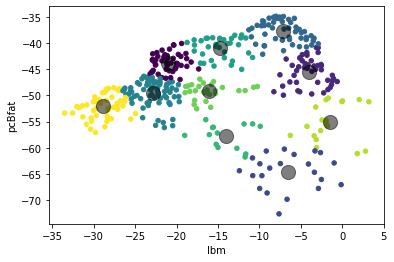

In [28]:
# Find clusters in Brazil
brazil2 = brazil[['lat', 'lng']]

kmeans = KMeans(n_clusters = 10)
kmeans.fit(brazil2)
y_means = kmeans.predict(brazil2)
plt.scatter(brazil['lat'], brazil['lng'], c=y_means, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.xlabel('lbm')
plt.ylabel('pcBfat')
plt.show()

In [29]:
# Plot on map

fig = go.Figure(data = go.Scattergeo(
    lon = brazil['lng'],
    lat = brazil['lat'],
    mode = 'markers',
    marker = dict(
        size = 11,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = True,
        symbol = 'circle',
        line = dict(
            width = 1,
            color = ['rgba(102, 102, 102)']
        ),
        cmin = 0,
        color = y_means,
        colorbar_title = "City Clusters"
    )
))

fig.add_trace(go.Scattergeo(
    lon = centers[:,1],
    lat = centers[:,0],
    mode = 'markers',
    marker = dict(
        size = 16,
        line = dict(
            width = 2,
            color = 'black'
        ),
        cmin = 0,
        color = 'orange',
        colorbar_title = "City Clusters"
    )
))

fig.update_layout(
    title = "Cities Around the World ",
    geo = dict(
        scope = "world",
        showland = True,
    )
)

fig.write_html('first_figure.html', auto_open=True)